In [16]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import lsst.afw.display as afwDisplay
afwDisplay.setDefaultBackend('matplotlib')
import lsst.daf.persistence as daf_persistence
import lsst.afw.geom as afwGeom
from lsst.afw.geom import Angle

In [2]:
from python.notebook_utils import look, SimMatcher, DummyFilter
from python.notebook_utils import plot_spectrum, plot_quasar_spectrum, plot_color, plot_quasar_color
from python.simulation_utils import simulation_wrapper

In [3]:
seed = 7
n_star = 10000
n_quasar = 1000
attenuation = 20.
output_directory = "/Users/sullivan/LSST/simulations/test%1i_quasars3nm/" % seed
sim = simulation_wrapper(seed=seed, n_star=n_star, n_quasar=n_quasar, output_directory=output_directory,
                         attenuation=attenuation,
                         write_catalog=False, write_fits=False, do_simulate=False)

Number and flux contribution of stars of each type:
 [M 7635| 1.52%] [K 1208| 2.35%] [G 799| 3.47%] [F 302| 3.82%] [A 48| 14.82%] [B 8| 74.02%] [O 0| 0.00%]


Set up the general parameters to use for all of the simulations 

<IPython.core.display.Javascript object>


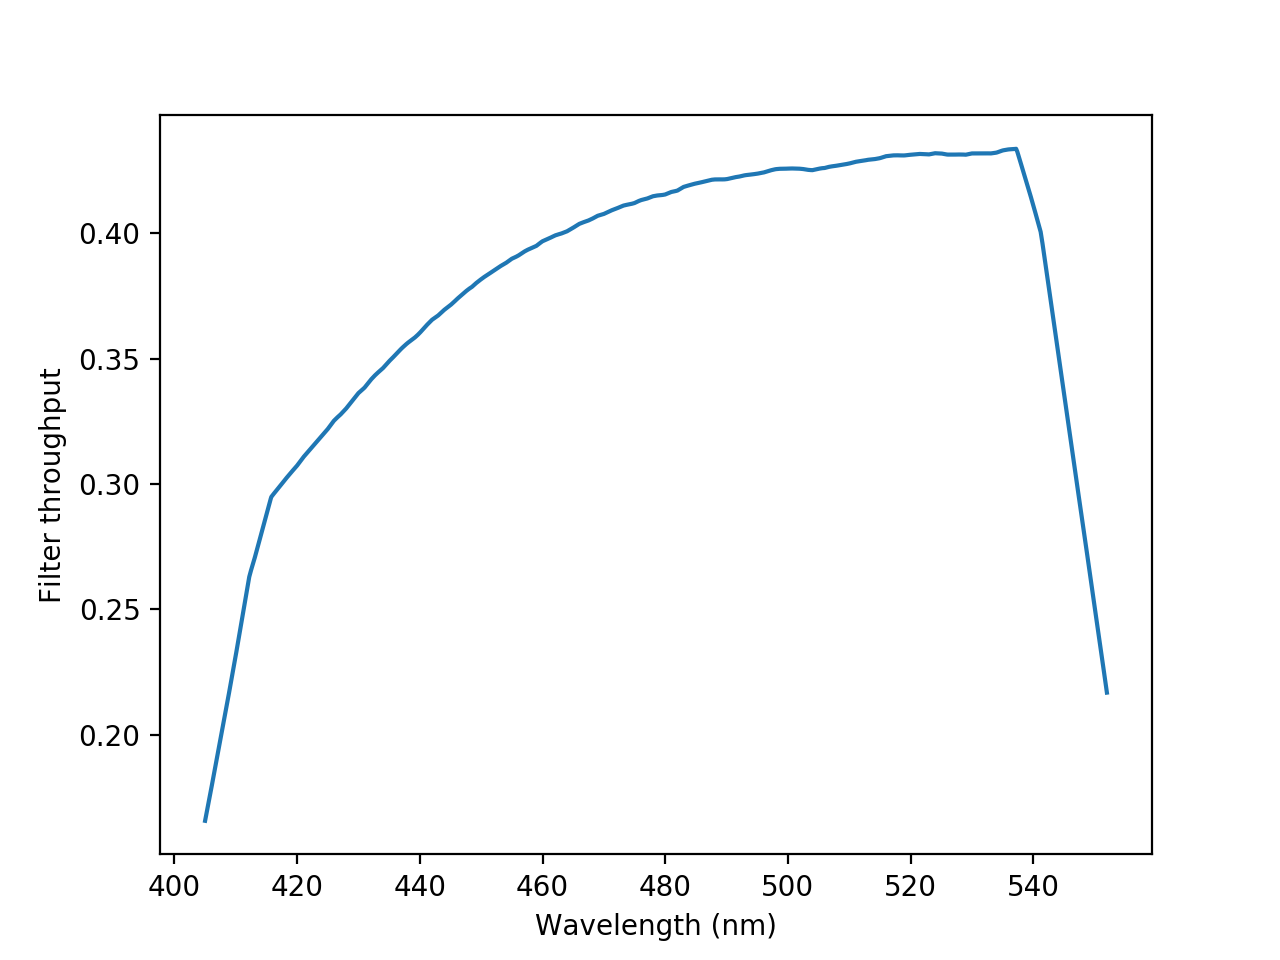

Text(0,0.5,'Filter throughput')

In [4]:
sim_bp = sim.bandpass_highres.getBandpass()
plot_1 = afwDisplay.Display(1)
plt.plot(sim_bp[0], sim_bp[1],)
    
plt.xlabel('Wavelength (nm)')
plt.ylabel('Filter throughput')

In [5]:
simMatcher = SimMatcher(sim, tolerance=.1/3600, verbose=True)

Matched: 2454, Unmatched: 7545
Matched: 272, Unmatched: 727


In [6]:
numDcrSubfilters = 3

In [7]:
filterInfo = DummyFilter()

In [30]:
repository = output_directory + 'input_data/rerun/processed_data/rerun/f%i_new_reg_split/' % numDcrSubfilters

Load measurements from the DCR model

In [31]:
butler_Cat = daf_persistence.Butler(repository)
meas_cats = [butler_Cat.get("dcrCoadd_meas",dataId={'tract':0,'patch':'1,1','filter':'g',
                                                    'subfilter':_s, 'numSubfilters':numDcrSubfilters})
             for _s in range(numDcrSubfilters)]

In [32]:
cat_matches = simMatcher.match_measurement(meas_cats[0], use_quasars=False, verbose=True)
quasar_matches = simMatcher.match_measurement(meas_cats[0], use_quasars=True, verbose=True)

Matched: 342, Unmatched: 399
Matched: 236, Unmatched: 505


434 2386
Temperature: 6497.019006K
Type F
sim coordinates: 289.285218, -30.231230
sim x,y: 942.414978, 704.517573
meas coordinates: 289.264652, -30.249020
meas x,y: 1130.398440, 1270.749210
[1161.22995793 1631.56760276 1492.79814937]
[8052.88254047 8756.94846324 9106.25676856]
Rescale factor: 0.165364


<IPython.core.display.Javascript object>


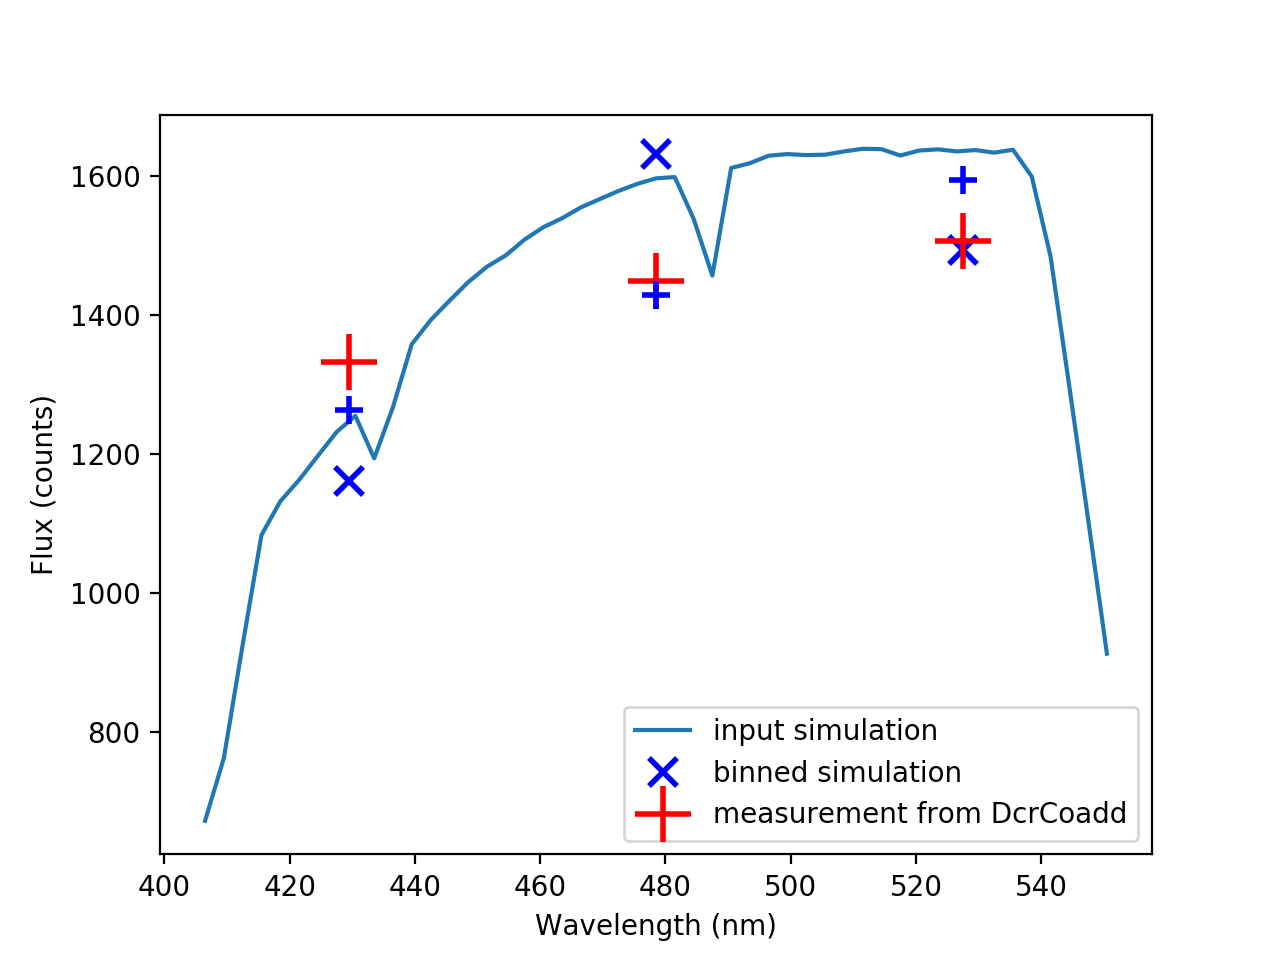

In [33]:
temperature = 6500
ind = simMatcher.find_spectrum(cat_matches, temperature)
print(ind, cat_matches[ind])
markersize = 20
plot_spectrum(sim, filterInfo, meas_cats, ind, cat_matches=cat_matches, star_T=simMatcher.star_T,
              rescale=True, use_throughput=False, markersize=markersize, window=2)
names = ['input simulation', 'binned simulation','measurement from DcrCoadd']

plt.legend(names)

Redshift: 2.698144
sim coordinates: 289.256255, -30.213576
sim x,y: 582.080523, 958.799706
meas coordinates: 289.235680, -30.231354
meas x,y: 1580.933361, 1588.733736
[11464.80696151 15444.51380264 10976.15233748]
[71206.73152393 74601.44649434 73681.71277926]
Rescale factor: 0.172607


<IPython.core.display.Javascript object>


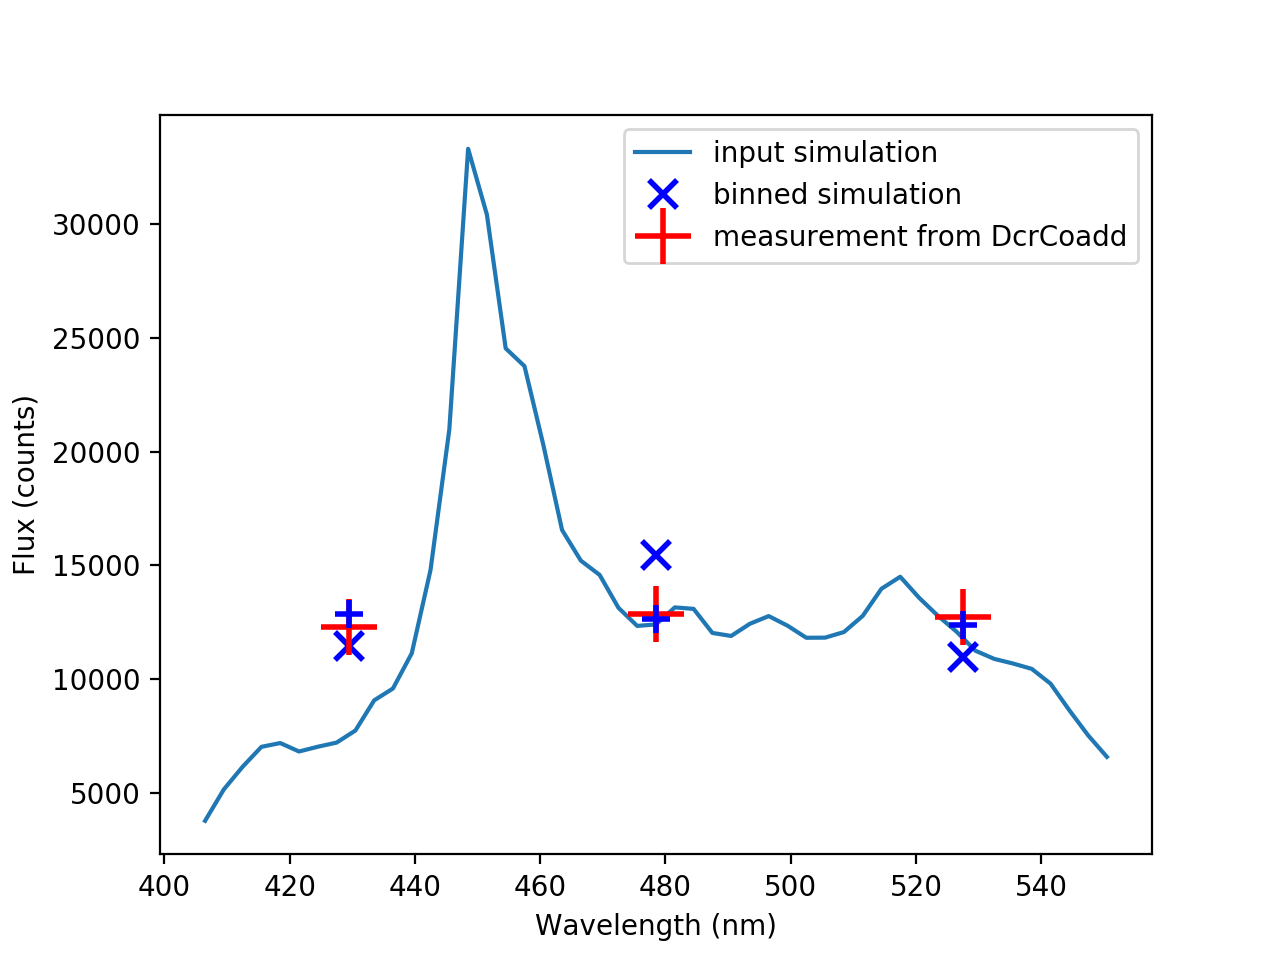

In [35]:
redshift = 2.7
ind = simMatcher.find_quasar_spectrum(quasar_matches, redshift)
markersize = 20
plot_quasar_spectrum(sim, filterInfo, meas_cats, ind, cat_matches=quasar_matches, quasar_Z=simMatcher.quasar_Z,
                     rescale=True, use_throughput=False, markersize=markersize, window=3)
names = ['input simulation', 'binned simulation','measurement from DcrCoadd']

plt.legend(names)

<IPython.core.display.Javascript object>


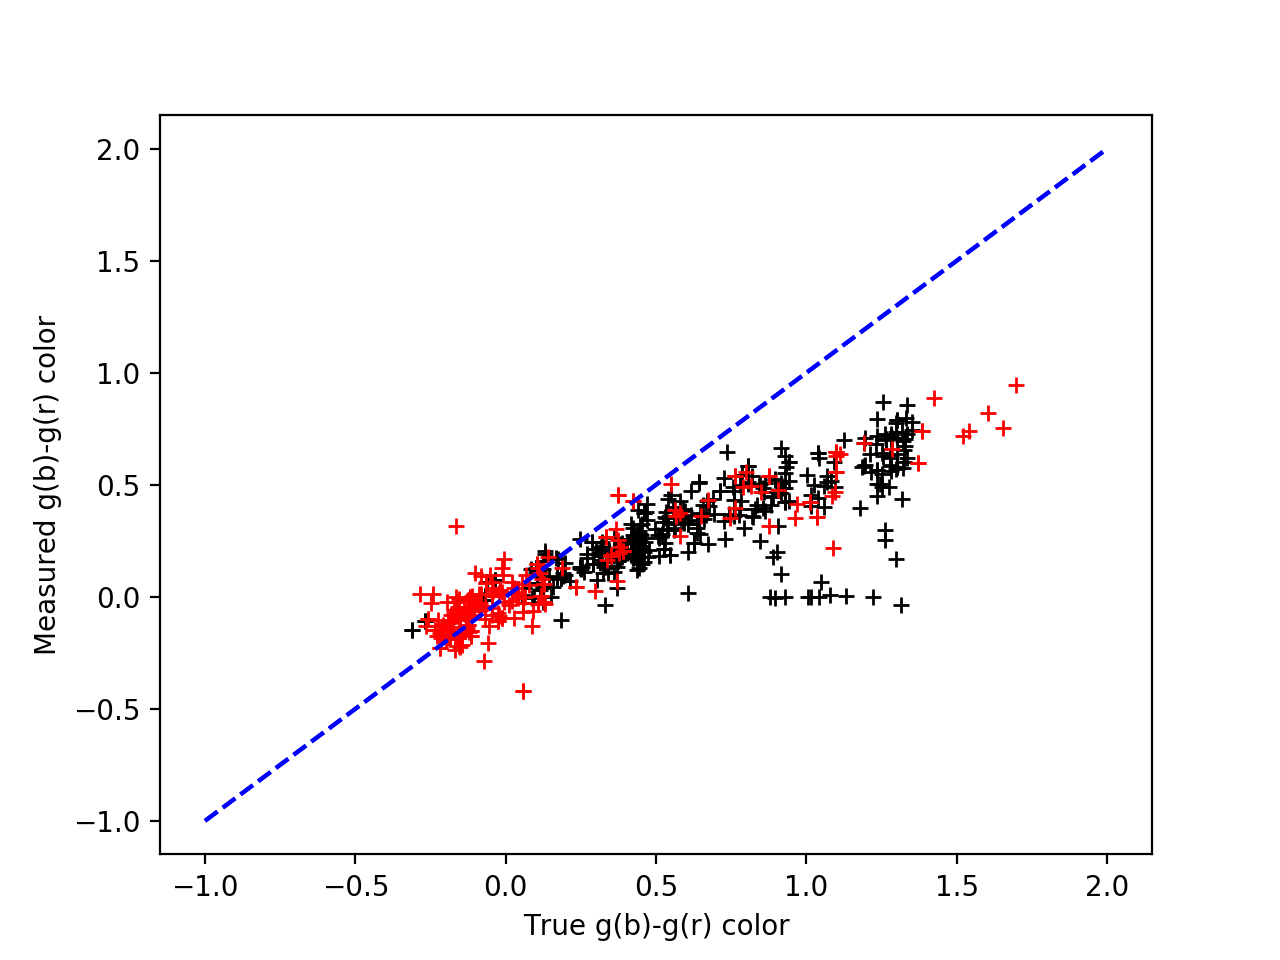

In [34]:
plot_color(sim, filterInfo, meas_cats, cat_matches, use_throughput=False, window=4)
plot_quasar_color(sim, filterInfo, meas_cats, quasar_matches, use_throughput=False, window=4)

<IPython.core.display.Javascript object>


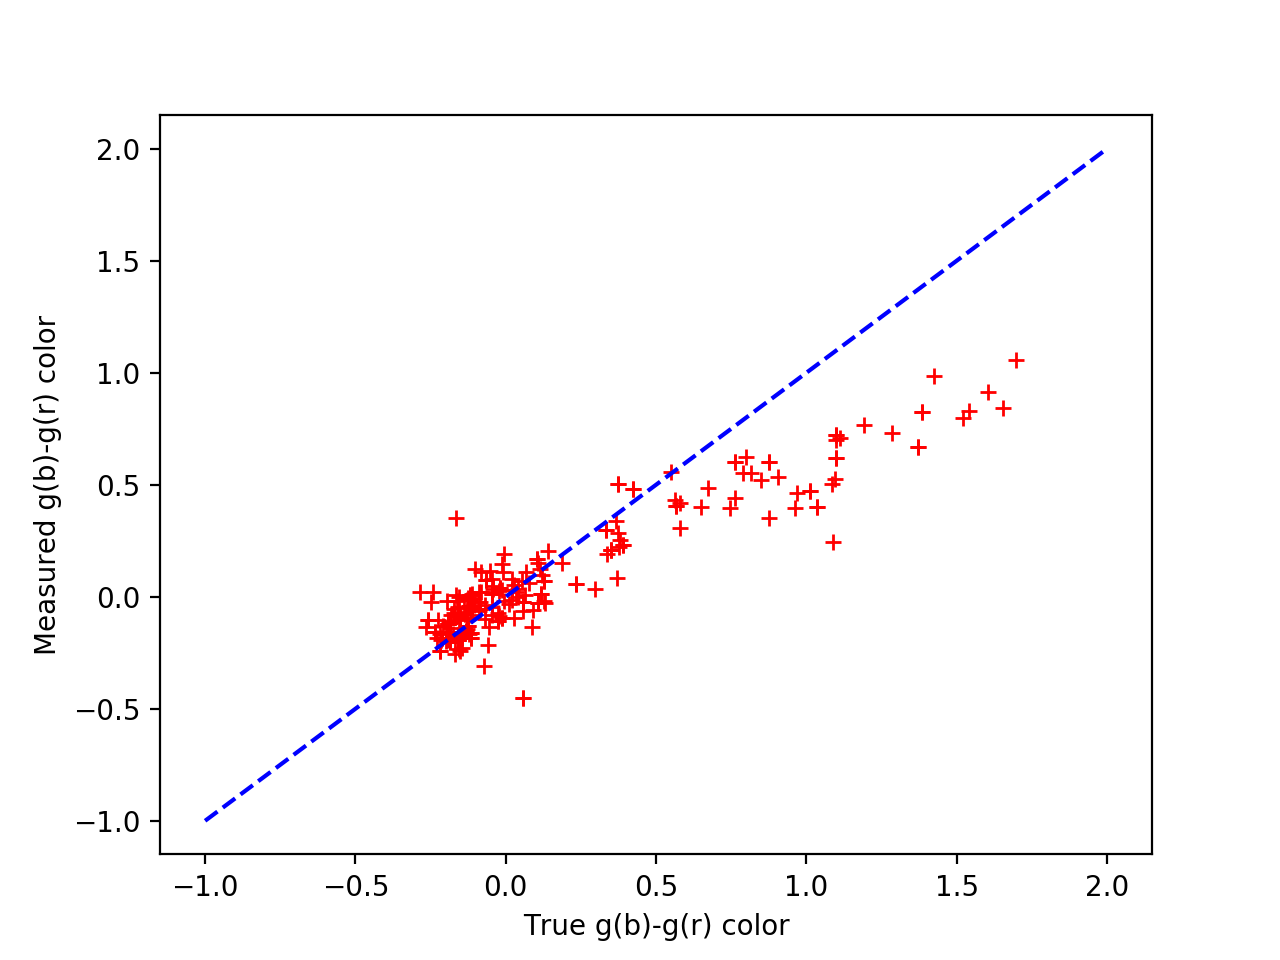

In [14]:
plot_quasar_color(sim, filterInfo, meas_cats, quasar_matches, use_throughput=False, window=5)